In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

###  Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [108]:
df=pd.read_excel('Election_Data.xlsx','Election_Dataset_Two Classes')

In [109]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [111]:
df=df.drop('Unnamed: 0',axis=1)

In [112]:
df.duplicated().sum()

8

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.duplicated().sum()

0

In [115]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [116]:
df.describe(include='object')

,vote,gender
count,1517,1517
unique,2,2
top,Labour,female
freq,1057,808


In [117]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [118]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(i,"Skewed: ",round(df[i].skew(),4))

age Skewed:  0.1398
economic.cond.national Skewed:  -0.2385
economic.cond.household Skewed:  -0.1441
Blair Skewed:  -0.5395
Hague Skewed:  0.1462
Europe Skewed:  -0.1419
political.knowledge Skewed:  -0.4229


### Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

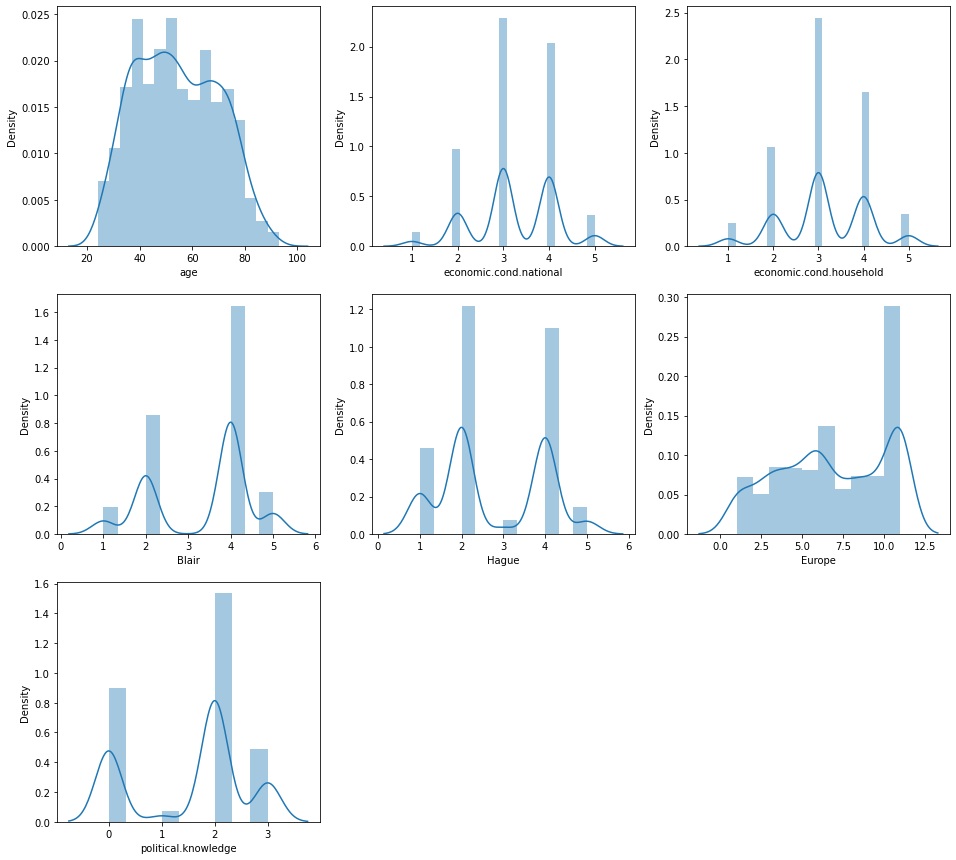

In [119]:
plt.figure(figsize=(16,15))
j=1
for i in ['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']:
    plt.subplot(3,3,j)
    sns.distplot(df[i])
    j=j+1
plt.show()

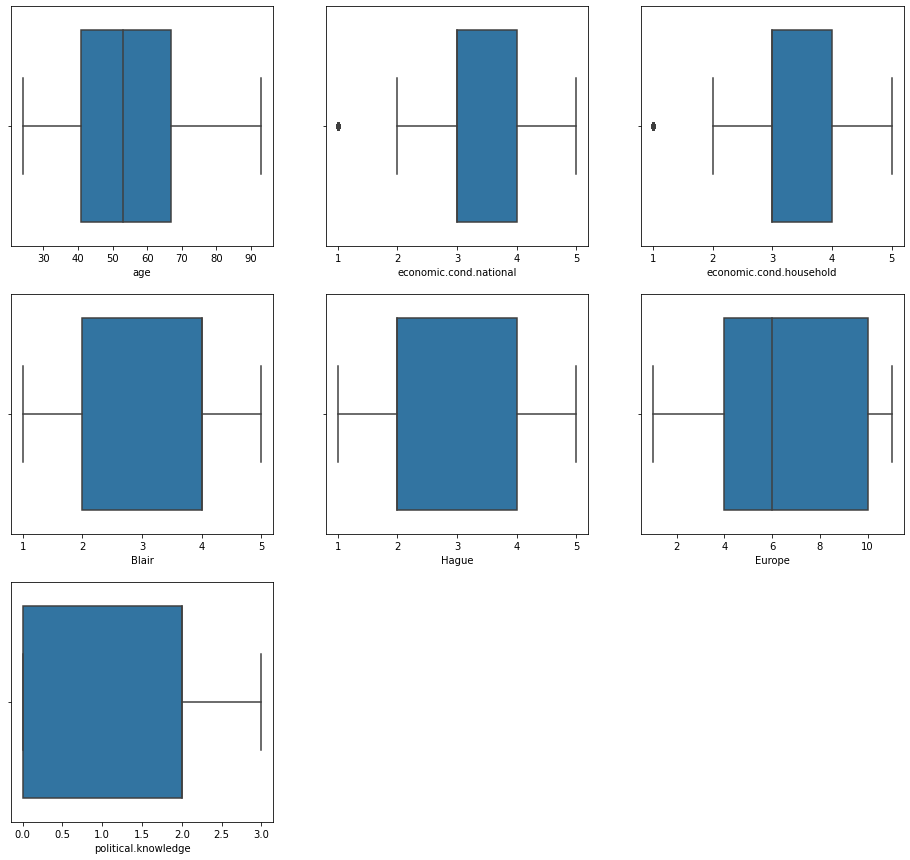

In [120]:
plt.figure(figsize=(16,15))
j=1
for i in ['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']:
    plt.subplot(3,3,j)
    sns.boxplot(df[i])
    j=j+1
plt.show()

In [121]:
for column in ['vote','gender']:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts())
    print('\n****************************\n')

VOTE :  2
Labour          1057
Conservative     460
Name: vote, dtype: int64

****************************

GENDER :  2
female    808
male      709
Name: gender, dtype: int64

****************************



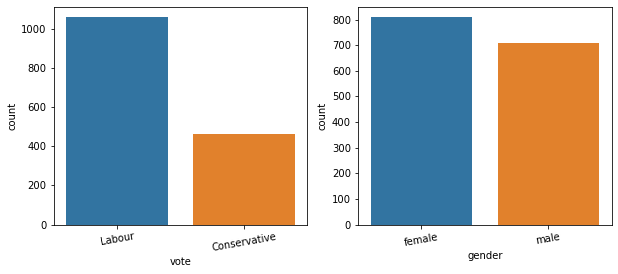

In [122]:
plt.figure(figsize=(10,4))

j=1
for i in ['vote','gender']:
    plt.subplot(1,2,j)
    sns.countplot(df[i])
    plt.xticks(rotation=10)
    j=j+1

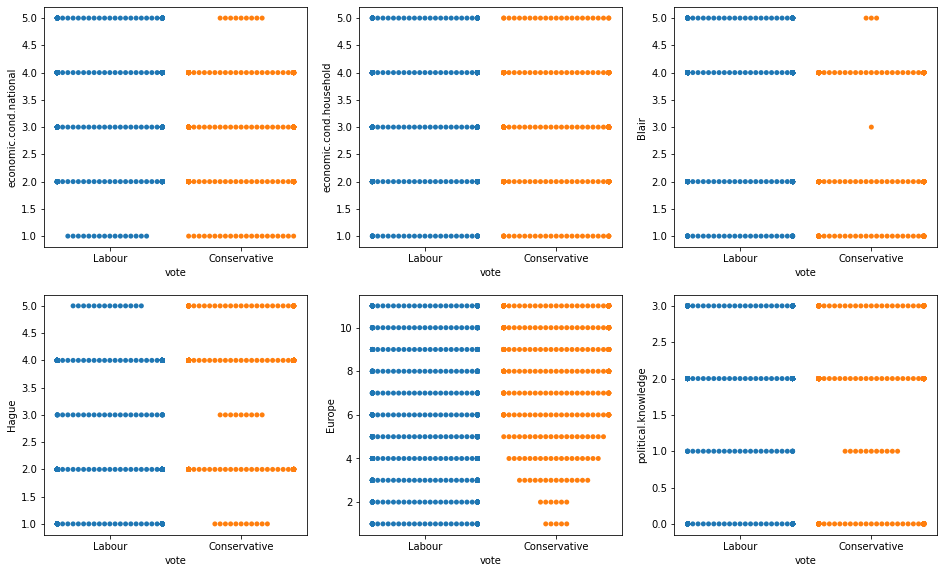

In [123]:
plt.figure(figsize=(16,15))
j=1
for i in ['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']:
    plt.subplot(3,3,j)
    sns.swarmplot(y=df[i],x=df['vote'])
    j=j+1
plt.show()

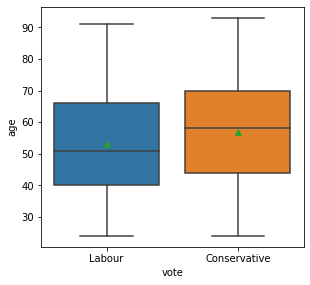

In [124]:
plt.figure(figsize=(16,15))
j=1
for i in ['age']:
    plt.subplot(3,3,j)
    sns.boxplot(y=df[i],x=df['vote'],showmeans=True)
    j=j+1
plt.show()

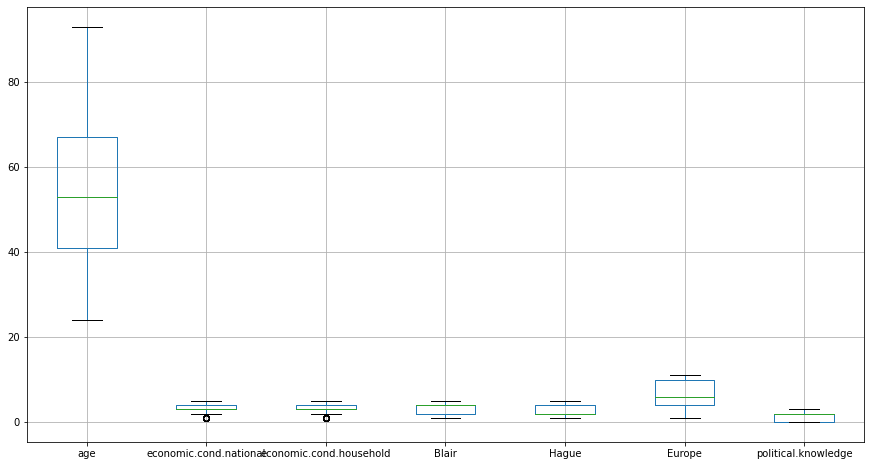

In [125]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

<Figure size 1152x1008 with 0 Axes>

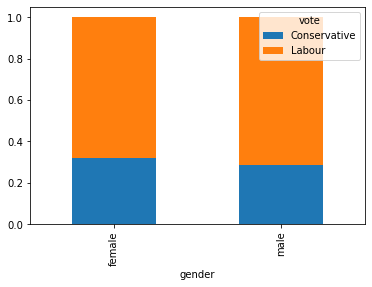

In [126]:
plt.figure(figsize=(16,14));
pd.crosstab(df['gender'], df['vote'], normalize='index').plot(kind='bar', stacked=True);


<AxesSubplot:>

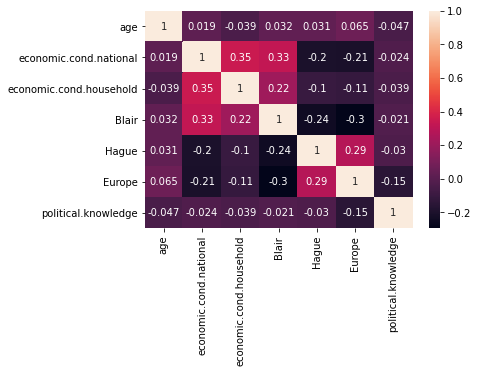

In [127]:
sns.heatmap(df.corr(),annot=True)

<Figure size 1152x864 with 0 Axes>

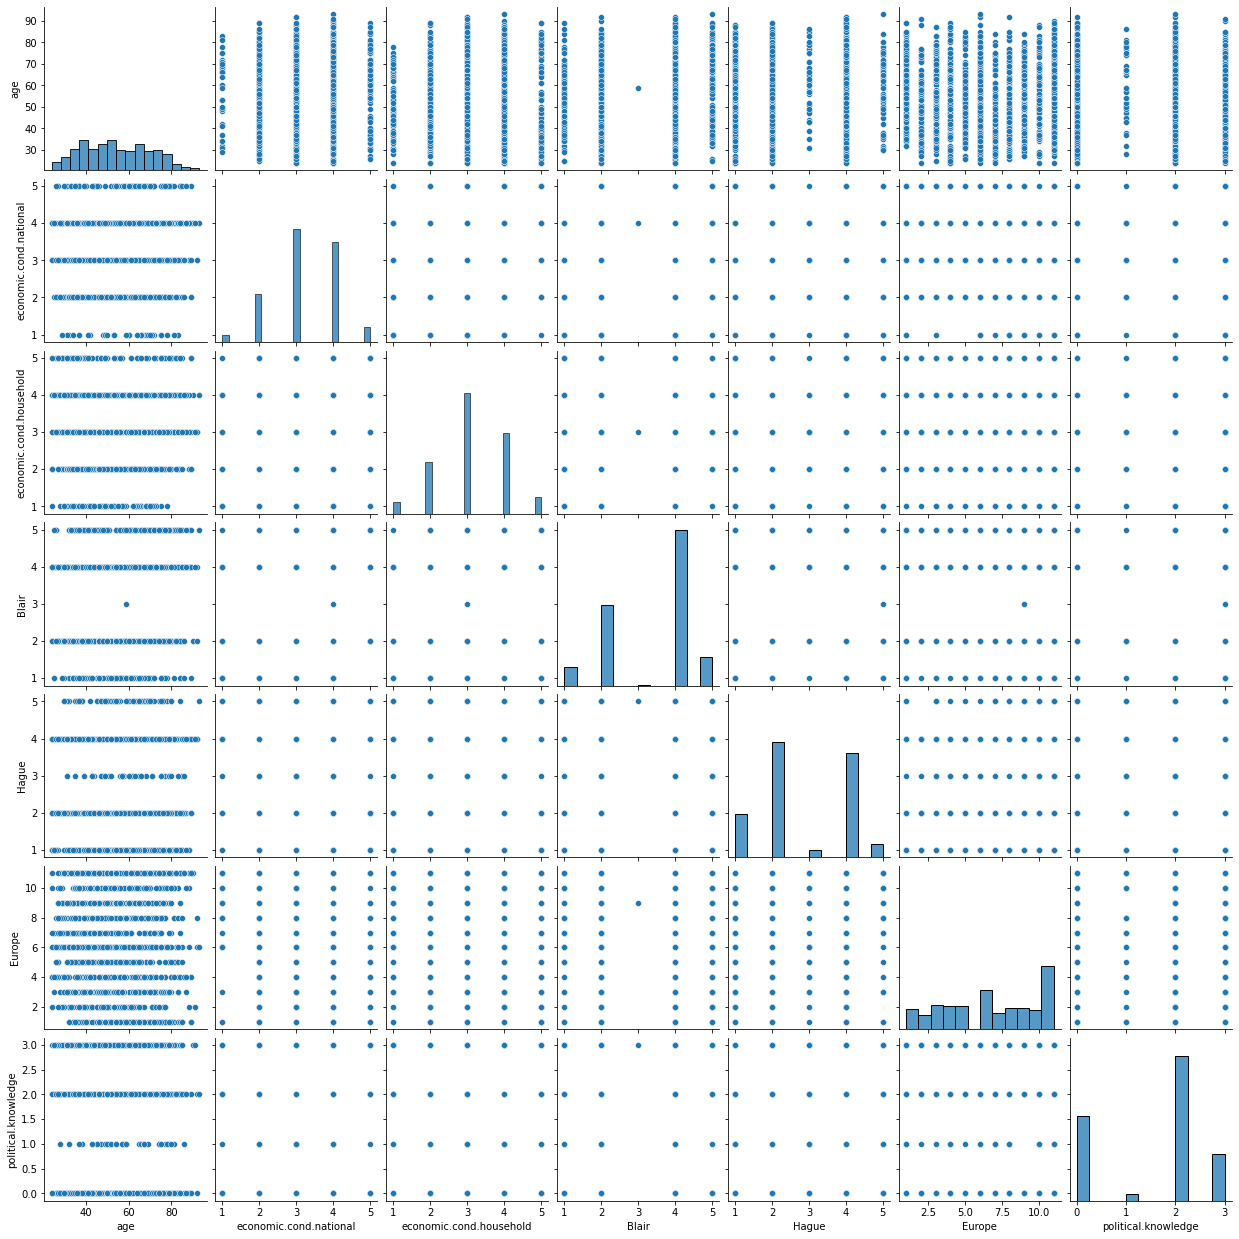

In [128]:
plt.figure(figsize=(16,12))
sns.pairplot(df)
plt.show()

### Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [129]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [130]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [132]:
X = df.drop("vote", axis=1)

y = df.pop("vote")

In [133]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [134]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (1061, 8)
X_test (456, 8)
train_labels (1061,)
test_labels (456,)


### Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

Logistic Regression 

Model tuning

In [142]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.0001,0.00001]}

In [143]:
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [144]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [145]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [146]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', solver='saga',
                   tol=1e-05)


In [147]:
best_model = grid_search.best_estimator_

In [148]:
best_model

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', solver='saga',
                   tol=1e-05)

In [149]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [150]:
print(confusion_matrix(train_labels,ytrain_predict))

[[196 111]
 [ 66 688]]


In [151]:

print(classification_report(train_labels, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



AUC ROC curve for Logistic Regression Train

AUC: 0.890


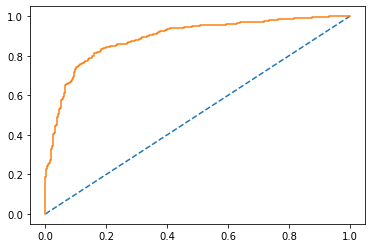

In [152]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [154]:

print(classification_report(test_labels, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [153]:
print(confusion_matrix(test_labels,ytest_predict))

[[111  42]
 [ 36 267]]


AUC ROC curve for Logistic Regression Test

AUC: 0.882


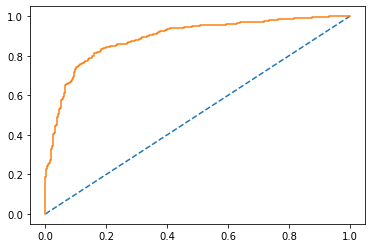

In [155]:
probs_test = best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

LDA (linear discriminant analysis)

In [156]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,train_labels)

In [159]:

pred_class_train = model.predict(X_train)

pred_class_test = model.predict(X_test)

In [160]:
print(classification_report(train_labels,pred_class_train),'\n')


              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [161]:
print(confusion_matrix(train_labels,pred_class_train))

[[200 107]
 [ 69 685]]


AUC ROC curve for LDA  Train

AUC: 0.889


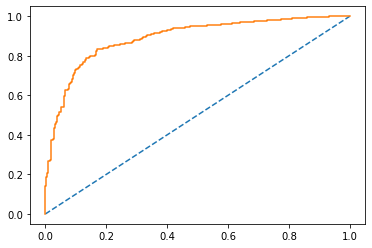

In [162]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [163]:
print(classification_report(test_labels,pred_class_test),'\n')

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [164]:
print(confusion_matrix(test_labels,pred_class_test))

[[111  42]
 [ 34 269]]


AUC ROC curve for LDA  Test

AUC: 0.888


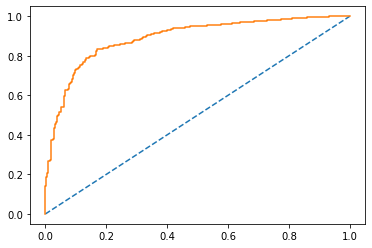

In [165]:
probs_test = model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

### Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

Naïve Bayes Model

In [168]:
NB_model = GaussianNB()
NB_model.fit(X_train, train_labels)

GaussianNB()

In [170]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, train_labels)                    
print(model_score)
print(classification_report(train_labels, y_train_predict)) 

0.8350612629594723
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [171]:
print(confusion_matrix(train_labels, y_train_predict))   

[[211  96]
 [ 79 675]]


AUC ROC curve for Naïve Bayes Model  Train

AUC: 0.888


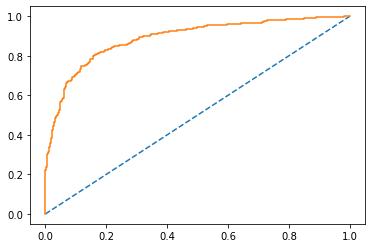

In [172]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [173]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, test_labels)                    ## Accuracy
print(model_score)
print(classification_report(test_labels, y_test_predict))

0.8223684210526315
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [174]:
print(confusion_matrix(test_labels, y_test_predict))         ## confusion_matrix


[[112  41]
 [ 40 263]]


AUC ROC curve for Naïve Bayes Model test

AUC: 0.876


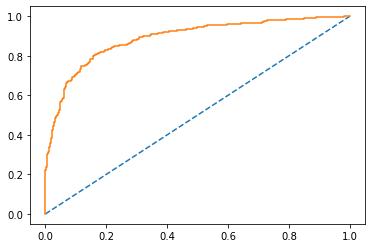

In [175]:
probs_test = NB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

KNN Model 

In [178]:
from scipy.stats import zscore

In [179]:
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [180]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,train_labels)

KNeighborsClassifier()

In [181]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, train_labels)
print(model_score)
print(metrics.confusion_matrix(train_labels, y_train_predict))
print(metrics.classification_report(train_labels, y_train_predict))

0.8539114043355325
[[217  90]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [182]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict))
print(metrics.classification_report(test_labels, y_test_predict))

0.8245614035087719
[[108  45]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [183]:
# empty list that will hold accuracy scores
trn_scores = []
test_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train_labels)
    # evaluate test accuracy
    scores = knn.score(X_test, test_labels)
    scores1 = knn.score(X_train, train_labels)
    trn_scores.append(scores)
    test_scores.append(scores1)

# changing to misclassification error
MCE_trn = [1 - x for x in trn_scores]
MCE_test = [1 - x for x in test_scores]

# np.subtract(MCE_trn,MCE_test)
np.subtract(trn_scores,test_scores)

array([-0.21710526, -0.0607235 , -0.02935   , -0.03152438, -0.0243109 ,
       -0.00926799, -0.01521239, -0.00924938, -0.00047745, -0.01051846])

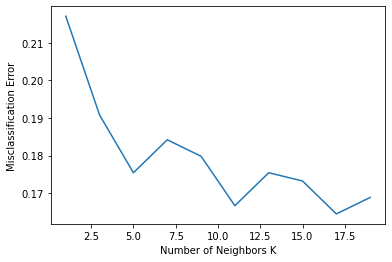

In [184]:
plt.plot(range(1,20,2), MCE_trn)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [185]:
KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train,train_labels)

KNeighborsClassifier(n_neighbors=11)

In [186]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, train_labels)
print(model_score)
print(metrics.confusion_matrix(train_labels, y_train_predict))
print(metrics.classification_report(train_labels, y_train_predict))

0.8426013195098964
[[209  98]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



AUC ROC curve for KNN Model train

AUC: 0.909


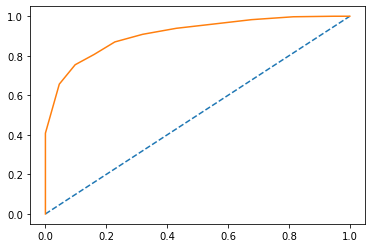

In [187]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [188]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict))
print(metrics.classification_report(test_labels, y_test_predict))

0.8333333333333334
[[106  47]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC ROC curve for KNN Model test

AUC: 0.890


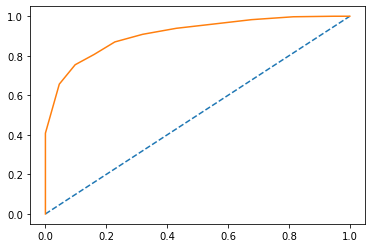

In [189]:
probs_test = KNN_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

### Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

In [231]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

Random Forest

In [232]:
param_grid = {
    'max_depth': [10,12,15],
    'max_features': [3,4,5],
    'min_samples_split': [40,45,60], 
    'n_estimators': [101,51] 
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [233]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 12, 15], 'max_features': [3, 4, 5],
                         'min_samples_split': [40, 45, 60],
                         'n_estimators': [101, 51]})

In [234]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 3,
 'min_samples_split': 40,
 'n_estimators': 51}

In [235]:
best_grid_rfcl = grid_search.best_estimator_

In [236]:
print(
    pd.DataFrame(best_grid_rfcl.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                              Imp
Hague                    0.271886
Europe                   0.233233
Blair                    0.223563
economic.cond.national   0.089782
political.knowledge      0.080115
age                      0.061031
economic.cond.household  0.035473
gender                   0.004917


In [237]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [238]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8661639962299718

In [239]:
print(classification_report(train_labels, ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       307
           1       0.88      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.86      0.87      0.86      1061



In [240]:
confusion_matrix(train_labels, ytrain_predict_rfcl)

array([[213,  94],
       [ 48, 706]], dtype=int64)

AUC ROC curve for Random forest Model Train

AUC: 0.927


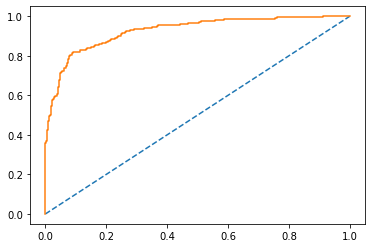

In [241]:
# predict probabilities
probs = best_grid_rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [242]:
confusion_matrix(test_labels, ytest_predict_rfcl)

array([[ 99,  54],
       [ 21, 282]], dtype=int64)

In [243]:
print(classification_report(test_labels, ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.65      0.73       153
           1       0.84      0.93      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



AUC ROC curve for Random forest Model test

AUC: 0.895


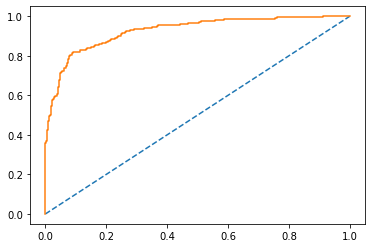

In [244]:
probs_test = best_grid_rfcl.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

Bagging Classifier

In [209]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth=10, max_features=3)
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=101,random_state=1)
Bagging_model.fit(X_train, train_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        max_features=3),
                  n_estimators=101, random_state=1)

In [210]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, train_labels)
print(model_score)
print(metrics.confusion_matrix(train_labels, y_train_predict))
print(metrics.classification_report(train_labels, y_train_predict))

0.9736098020735156
[[289  18]
 [ 10 744]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       307
           1       0.98      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.97      1061
weighted avg       0.97      0.97      0.97      1061



AUC ROC curve for BaggingClassifier Model Train

AUC: 0.997


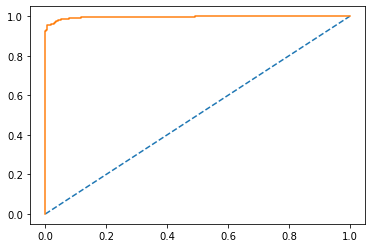

In [206]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [207]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict))
print(metrics.classification_report(test_labels, y_test_predict))

0.8289473684210527
[[102  51]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



AUC ROC curve for BaggingClassifier Model test

AUC: 0.896


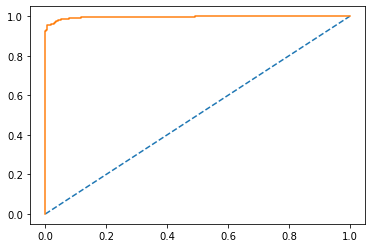

In [208]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

Gradient Boosting

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, train_labels)

In [212]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, train_labels)
print(model_score)
print(metrics.confusion_matrix(train_labels, y_train_predict))
print(metrics.classification_report(train_labels, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



AUC ROC curve for Gradient Boosting Model Train

AUC: 0.951


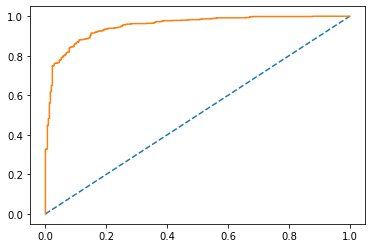

In [213]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [214]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict))
print(metrics.classification_report(test_labels, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC ROC curve for Gradient Boosting Model test

AUC: 0.899


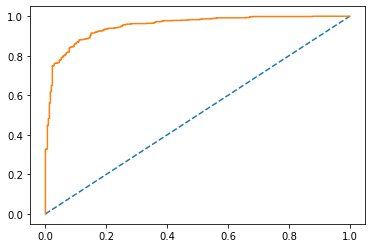

In [215]:
probs_test = gbcl.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

Ada Boost

In [216]:
from sklearn.ensemble import AdaBoostClassifier

In [217]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,train_labels)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [218]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,train_labels)
print(ADB_model_score)

print(metrics.confusion_matrix(train_labels,y_train_predict))
print(metrics.classification_report(train_labels,y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC ROC curve for Ada Boost Model Train

AUC: 0.915


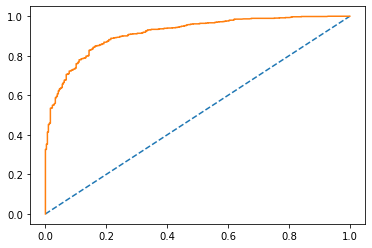

In [219]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [220]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, test_labels)
print(ADB_model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict))
print(metrics.classification_report(test_labels, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC ROC curve for Ada Boost Model test

AUC: 0.877


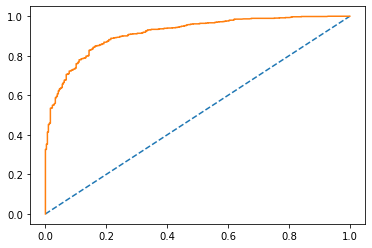

In [221]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(test_labels, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

###  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

All the requrement i have done please refere the project report and for the code reference see there respective model performance in Q.1.4 to Q.1.6.

### Based on these predictions, what are the insights? (5 marks)

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [490]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
data=inaugural.raw('1941-Roosevelt.txt')

[nltk_data] Downloading package inaugural to C:\Users\Pradeep
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [491]:
import string

1941-Roosevelt.txt

### Find the number of characters, words, and sentences for the mentioned documents.

In [522]:
words=inaugural.words('1941-Roosevelt.txt')

In [523]:
len(words)

1536

In [524]:
sentence=inaugural.sents('1941-Roosevelt.txt')

In [525]:
len(sentence)

68

In [526]:
characters = len(inaugural.raw('1941-Roosevelt.txt'))

In [527]:
characters

7571

### Remove all the stopwords from all three speeches.

In [528]:
all_Words = [x.lower() for x in words]


In [529]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to C:\Users\Pradeep
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pradeep
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [530]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [531]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [543]:
list_stop=['--',"let",'know',"us","day","since","people","america","years","american"]

In [544]:
stopwords = (
    nltk.corpus.stopwords.words("english") + list(string.punctuation)  + list_stop
)

In [545]:
all_words_clean = [word for word in all_Words if word not in stopwords]

In [546]:
all_words_clean

['national',
 'inauguration',
 '1789',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'task',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'task',
 'preserve',
 'nation',
 'disruption',
 'within',
 'task',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained',
 'reason',
 'tyranny',
 'slavery',
 'become',
 'surging',
 'wave',
 'future',
 'freedom',
 'ebbing',
 'tide

### Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [614]:
data=inaugural.raw('1941-Roosevelt.txt')

In [615]:
lower_data = " ".join(x.lower() for x in data.split()
)

In [616]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [617]:
removal_stop=" ".join(x for x in lower_data.split() if x not in stop)

In [618]:
list_stop=['--',"let",'know',"us","day","since","people","america","years","american"]

In [619]:
removal_stop=" ".join(x for x in removal_stop.split() if x not in list_stop)

In [620]:
removal_pun=" ".join(x for x in removal_stop.split() if x not in list(string.punctuation))

In [621]:
all_Words = [x for x in pd.Series(removal_pun.split())]

In [622]:
nltk.FreqDist(all_Words).most_common(10)

[('life', 6),
 ('nation', 5),
 ('human', 5),
 ('freedom', 5),
 ('democracy', 5),
 ('spirit', 5),
 ('speaks', 5),
 ('men', 4),
 ('new', 4),
 ('nation,', 4)]

###  Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

Word Cloud for Apple_Tweets (after cleaning)!!


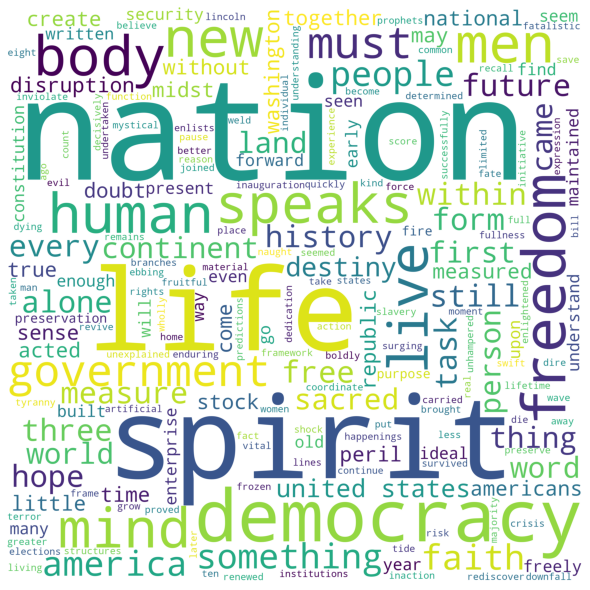

In [623]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=3000,
    height=3000,
    background_color="white",
    min_font_size=10,
    random_state=100,
).generate(removal_pun)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

1961-Kennedy.txt

In [593]:
data_Kennedy=inaugural.raw('1961-Kennedy.txt')

In [596]:
words_Kennedy = inaugural.words('1961-Kennedy.txt')

In [597]:
len(words_Kennedy)

1546

In [598]:
sentence=inaugural.sents('1961-Kennedy.txt')

In [599]:
len(sentence)

52

In [600]:
characters = len(inaugural.raw('1961-Kennedy.txt'))

In [601]:
characters

7618

In [625]:
data=inaugural.raw('1961-Kennedy.txt')
lower_data = " ".join(x.lower() for x in data.split()
)
removal_stop=" ".join(x for x in lower_data.split() if x not in stop)

list_stop=['--','mr','let',"vice","president","johnson","bt","yo","u","us","Let","world","new","shall"]
removal_stop=" ".join(x for x in removal_stop.split() if x not in list_stop)
removal_pun=" ".join(x for x in removal_stop.split() if x not in list(string.punctuation))
all_Words = [x for x in pd.Series(removal_pun.split())]
nltk.FreqDist(all_Words).most_common(10)




[('pledge', 7),
 ('sides', 7),
 ('ask', 5),
 ('fellow', 4),
 ('freedom', 4),
 ('power', 4),
 ('first', 4),
 ('always', 4),
 ('cannot', 4),
 ('call', 4)]

Word Cloud for Apple_Tweets (after cleaning)!!


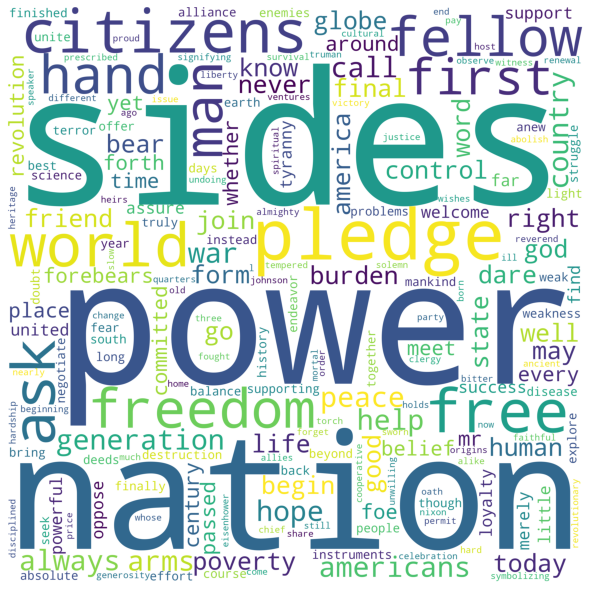

In [626]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=3000,
    height=3000,
    background_color="white",
    min_font_size=10,
    random_state=100,
).generate(removal_pun)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

1973-Nixon.txt

In [471]:
data_Nixon= inaugural.raw('1973-Nixon.txt')

In [472]:
stripped_string = data_Nixon.replace("u","")

In [473]:
print(len(data_Nixon))

9991


In [474]:
words_Nixon= inaugural.words('1973-Nixon.txt')

In [475]:
print(len(words_Nixon))

2028


In [476]:
sentence=inaugural.sents('1973-Nixon.txt')

In [477]:
print(len(sentence))

69


In [631]:
data=inaugural.raw('1973-Nixon.txt')
lower_data = " ".join(x.lower() for x in data.split()
)
removal_stop=" ".join(x for x in lower_data.split() if x not in stop)

list_stop=['--','mr','let',"vice","president","johnson","bt","yo","u","us","Let","world","new","shall","america","america's","world","world."]
removal_stop=" ".join(x for x in removal_stop.split() if x not in list_stop)
removal_pun=" ".join(x for x in removal_stop.split() if x not in list(string.punctuation))
all_Words = [x for x in pd.Series(removal_pun.split())]
nltk.FreqDist(all_Words).most_common(10)


[('peace', 11),
 ('great', 9),
 ('policies', 7),
 ('make', 7),
 ('every', 7),
 ('better', 7),
 ('government', 7),
 ('abroad', 6),
 ('role', 6),
 ('people', 6)]

Word Cloud for Apple_Tweets (after cleaning)!!


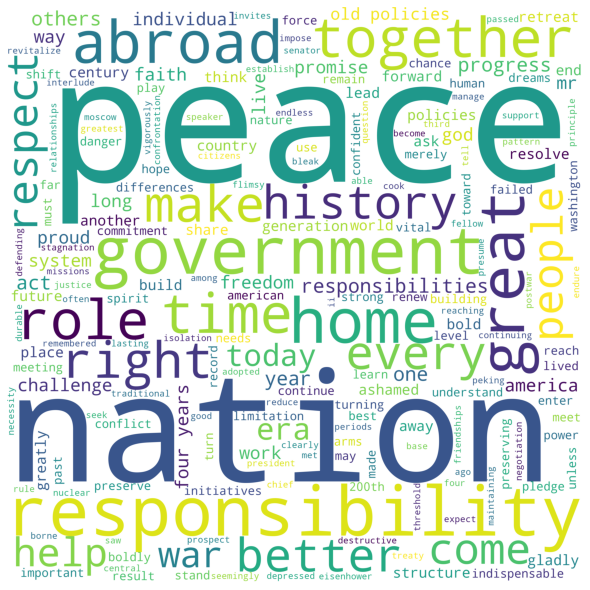

In [632]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=3000,
    height=3000,
    background_color="white",
    min_font_size=10,
    random_state=100,
).generate(removal_pun)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()